# Advanced Pairs Trading : Kalman Filters

## Import library

In [22]:
import sys
sys.path.append('../../')

In [23]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter
from util.Save_result_return import save_to_csv

In [24]:
import pandas as pd
pd.options.mode.chained_assignment = None

## Getting the Data

In [25]:
XAUUSD = load_data()

## Class Kalman Filter

## Currency_Pair

In [26]:
Currency_Pair = 'AUDUSD'

## TF D1

In [27]:
TF = 'D1'

In [28]:
data_1 = XAUUSD[TF]

In [29]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

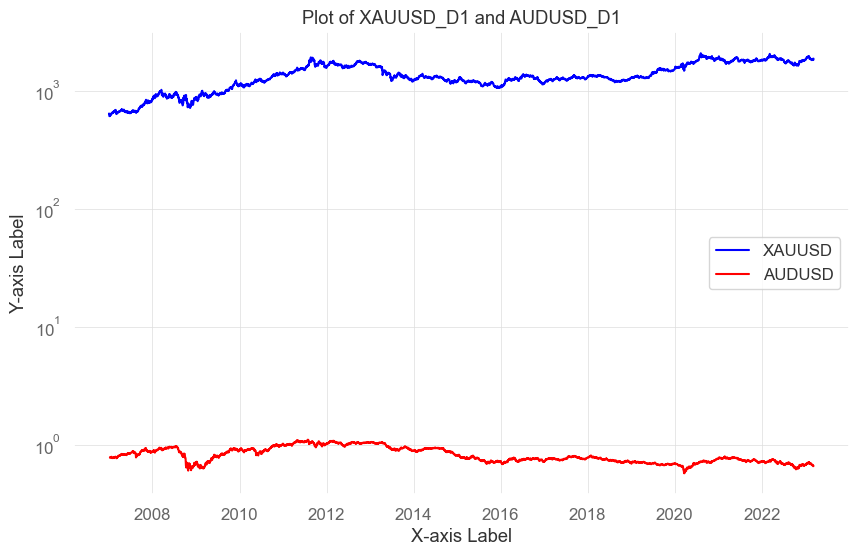

In [30]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [31]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [32]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                          6.014e+04
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        08:52:38   Log-Likelihood:                         -36850.
No. Observations:                4999   AIC:                                  7.370e+04
Df Residuals:                    4998   BIC:                                  7.371e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1603.5812      6.539    245.235      0.000    1590.762    1616.400
==============================================================================
Omnibus:                      179.893   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.424
Skew:                           0.336   Prob(JB):                     4.35e-32
Kurtosis:                       2.509   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
result = KF.Run()

In [34]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.919633
Multiple (Buy-and-Hold):     3.70236
--------------------------------------
Out-/Underperformance:       -2.782727


CAGR:                        -0.005226
Annualized Mean:             -0.00524
Annualized Std:              0.023604
Sharpe Ratio:                -0.221988
Sortino Ratio:               -0.2994
Maximum Drawdown:            0.137667
Calmar Ratio:                -0.037962
Max Drawdown Duration:       5706 Days
Kelly Criterion:             -8.913423


### Save Result Backtest 

In [35]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [36]:
filename = f'{Currency_Pair}_{TF}.csv'

In [37]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -8.45%
CAGR﹪                     -0.38%

Sharpe                     -0.2
Prob. Sharpe Ratio         18.64%
Smart Sharpe               -0.2
Sortino                    -0.27
Smart Sortino              -0.27
Sortino/√2                 -0.19
Smart Sortino/√2           -0.19
Omega                      0.96

Max Drawdown               -14.02%
Longest DD Days            5706
Volatility (ann.)          2.12%
Calmar                     -0.03
Skew                       -0.71
Kurtosis                   9.14

Expected Daily %           -0.0%
Expected Monthly %         -0.05%
Expected Yearly %          -0.52%
Kelly Criterion            -1.94%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.22%
Expected Shortfall (cVaR)  -0.22%

Max Consecutive W

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-07-18,2019-06-19,2023-03-01,5706,-14.019226,-13.447595
2,2007-04-13,2007-05-04,2007-05-09,27,-0.222166,-0.193031
3,2007-07-06,2007-07-10,2007-07-15,10,-0.118206,-0.086740
4,2007-06-10,2007-06-14,2007-06-22,13,-0.106207,-0.092408
5,2007-04-03,2007-04-06,2007-04-11,9,-0.090280,-0.079546


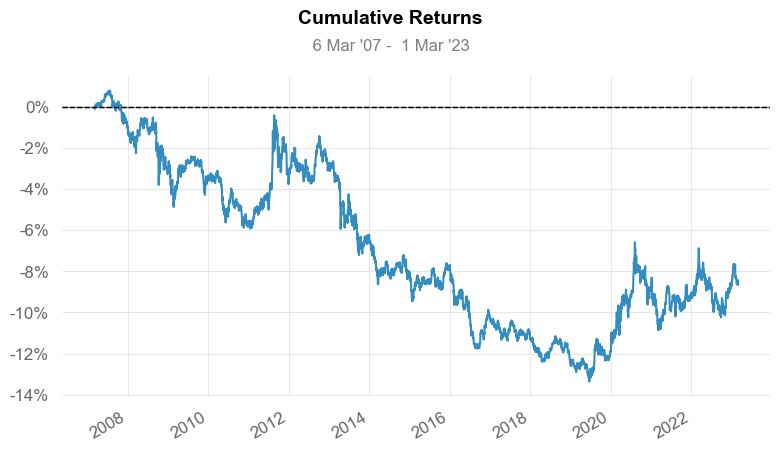

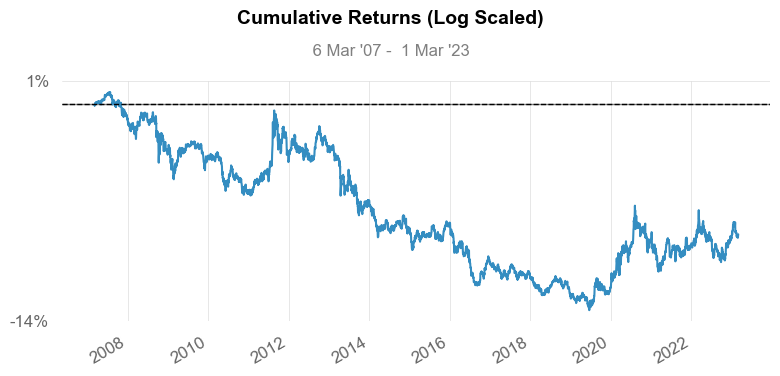

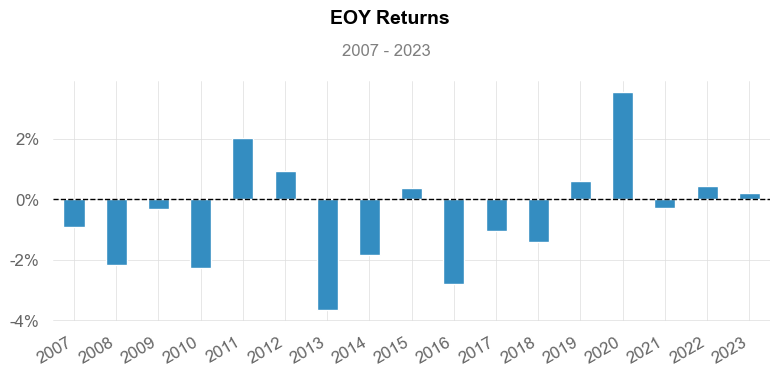

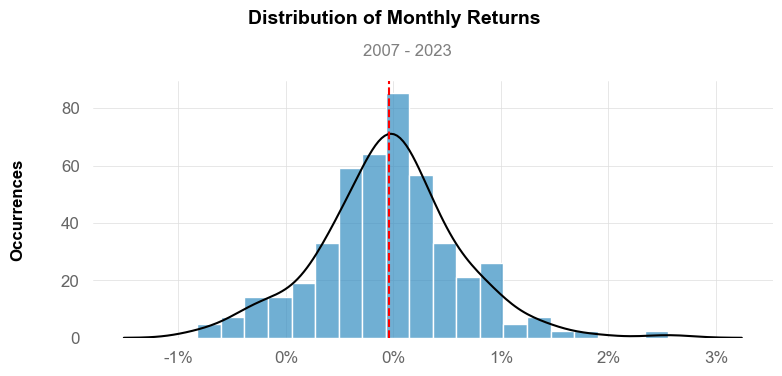

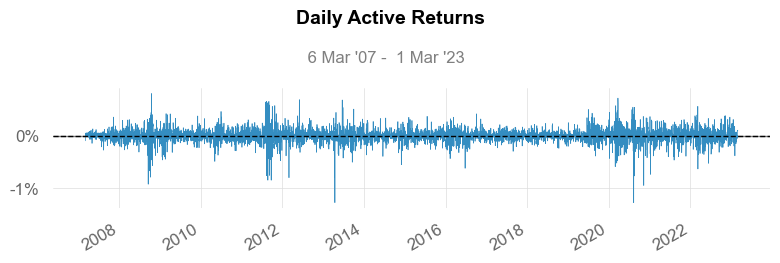

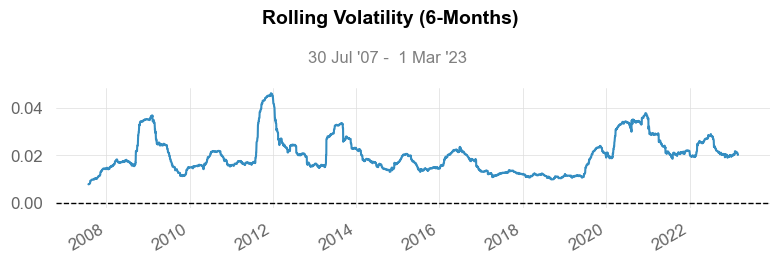

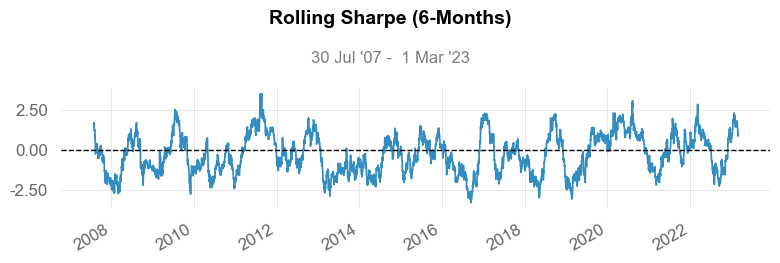

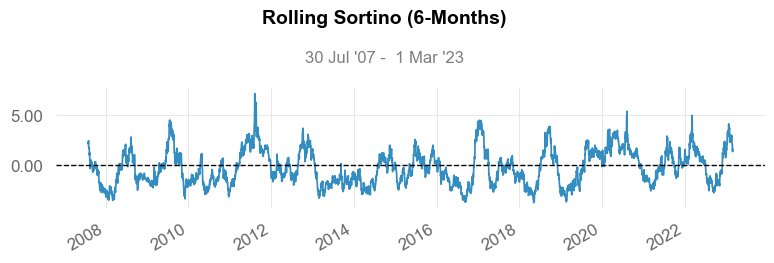

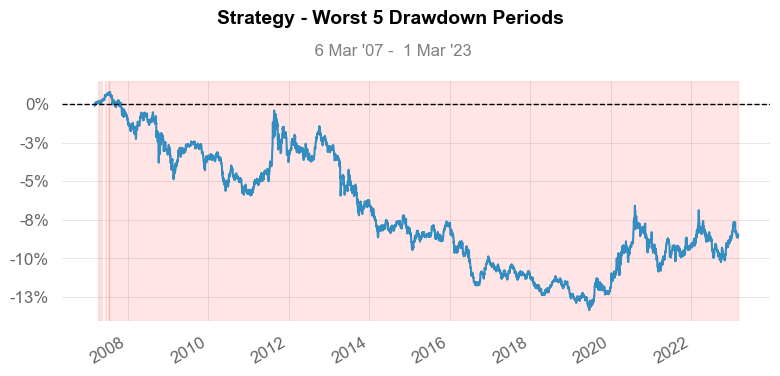

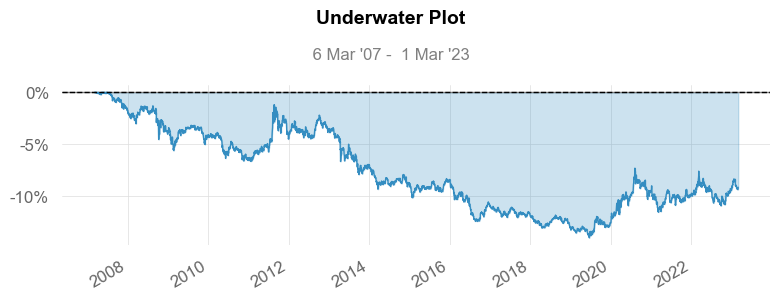

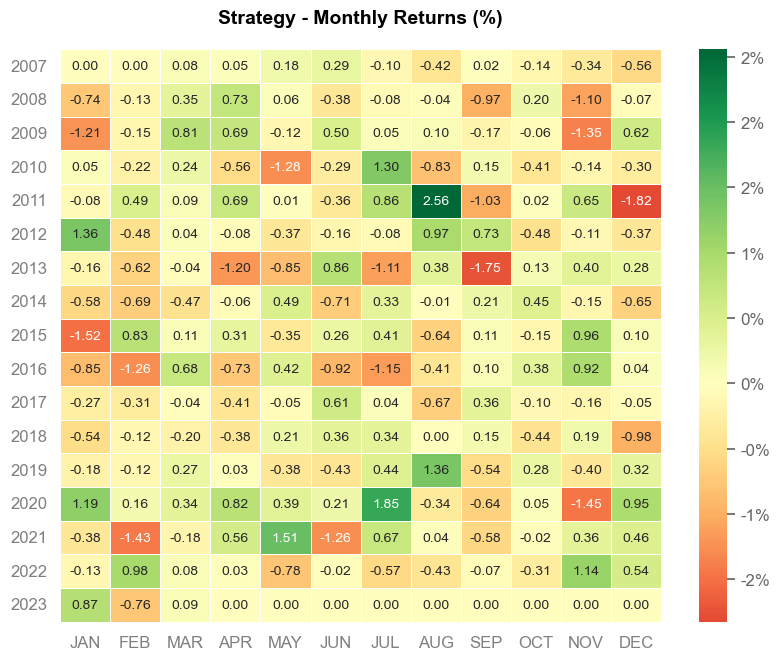

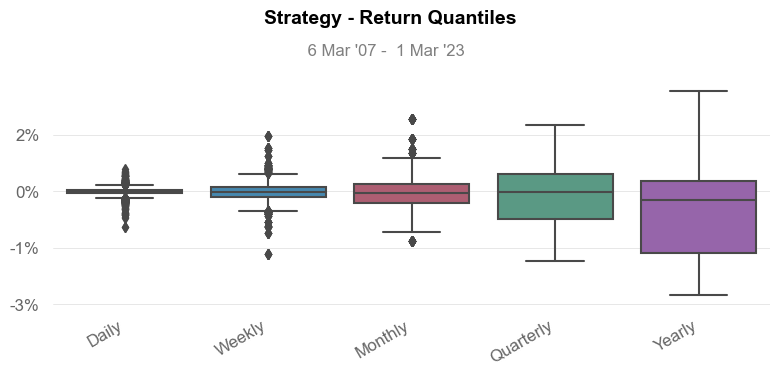

In [38]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H4

In [39]:
TF = 'H4'

In [40]:
data_1 = XAUUSD[TF]

In [41]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

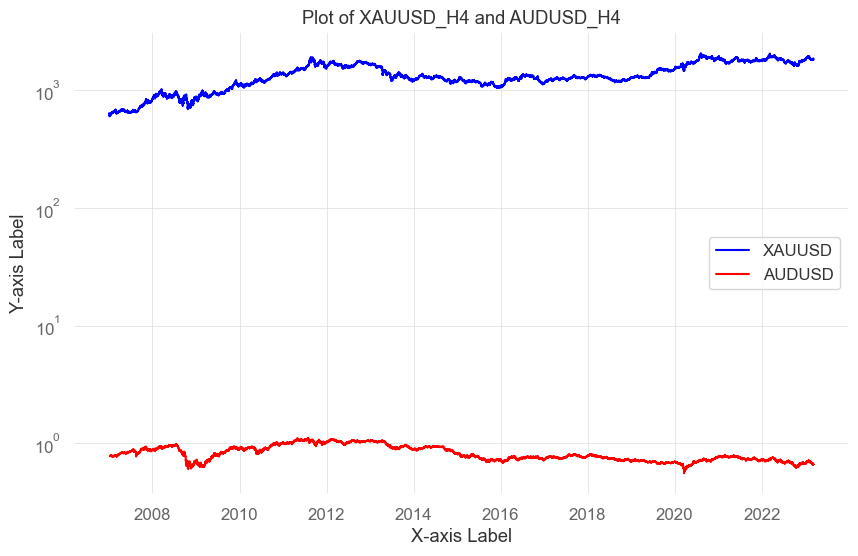

In [42]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [43]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [44]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                          3.121e+05
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        08:53:00   Log-Likelihood:                     -1.8854e+05
No. Observations:               25591   AIC:                                  3.771e+05
Df Residuals:                   25590   BIC:                                  3.771e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1608.3012      2.879    558.685      0.000    1602.659    1613.944
==============================================================================
Omnibus:                      929.957   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              750.211
Skew:                           0.341   Prob(JB):                    1.24e-163
Kurtosis:                       2.511   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
result = KF.Run()

In [46]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.932045
Multiple (Buy-and-Hold):     3.646865
--------------------------------------
Out-/Underperformance:       -2.71482


CAGR:                        -0.004392
Annualized Mean:             -0.004401
Annualized Std:              0.023598
Sharpe Ratio:                -0.186513
Sortino Ratio:               -0.257494
Maximum Drawdown:            0.125617
Calmar Ratio:                -0.034961
Max Drawdown Duration:       5706 Days
Kelly Criterion:             -7.40593


### Save Result Backtest 

In [47]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [48]:
filename = f'{Currency_Pair}_{TF}.csv'

In [49]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -7.22%
CAGR﹪                     -0.32%

Sharpe                     -0.17
Prob. Sharpe Ratio         22.52%
Smart Sharpe               -0.17
Sortino                    -0.23
Smart Sortino              -0.23
Sortino/√2                 -0.16
Smart Sortino/√2           -0.16
Omega                      0.97

Max Drawdown               -12.8%
Longest DD Days            5706
Volatility (ann.)          2.11%
Calmar                     -0.03
Skew                       -0.71
Kurtosis                   9.27

Expected Daily %           -0.0%
Expected Monthly %         -0.04%
Expected Yearly %          -0.44%
Kelly Criterion            -1.64%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.22%
Expected Shortfall (cVaR)  -0.22%

Max Consecutive 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-07-18,2019-06-19,2023-03-01,5706,-12.799267,-12.222975
2,2007-04-13,2007-05-04,2007-05-09,27,-0.228387,-0.193016
3,2007-07-06,2007-07-10,2007-07-15,10,-0.118197,-0.086734
4,2007-06-10,2007-06-14,2007-06-22,13,-0.111661,-0.097863
5,2007-04-03,2007-04-06,2007-04-11,9,-0.089394,-0.079539


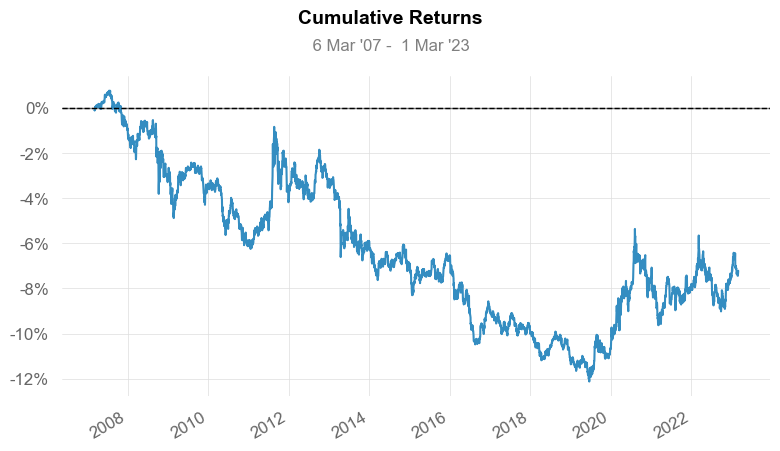

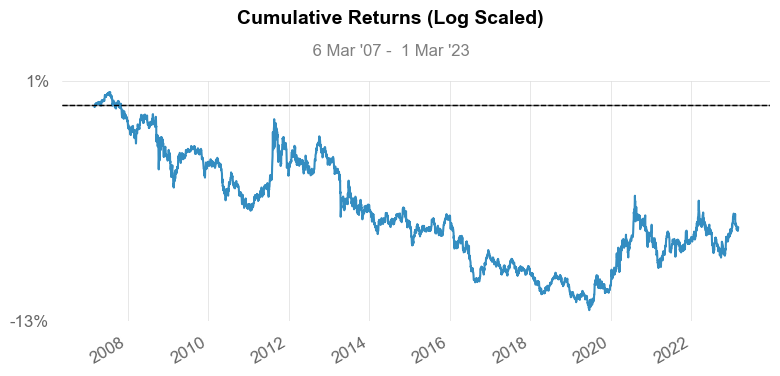

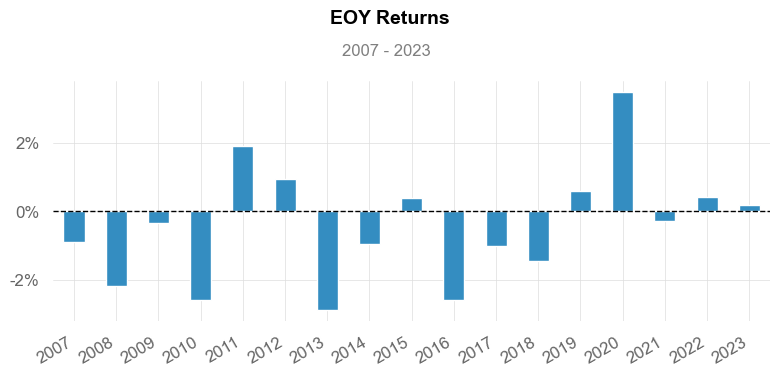

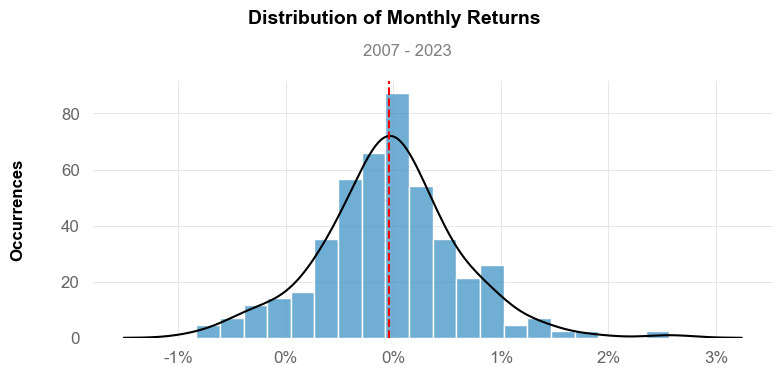

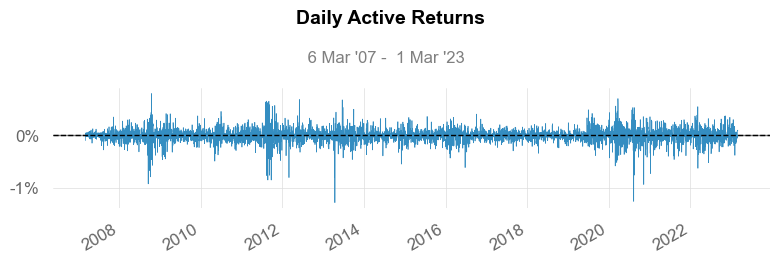

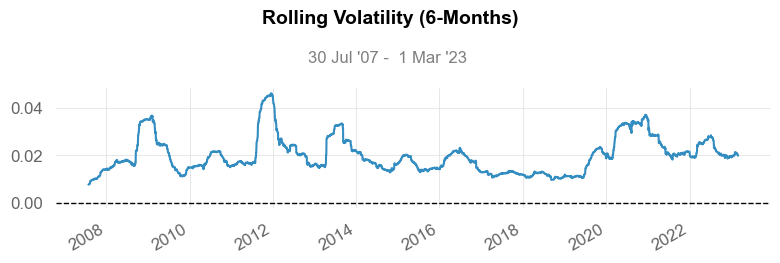

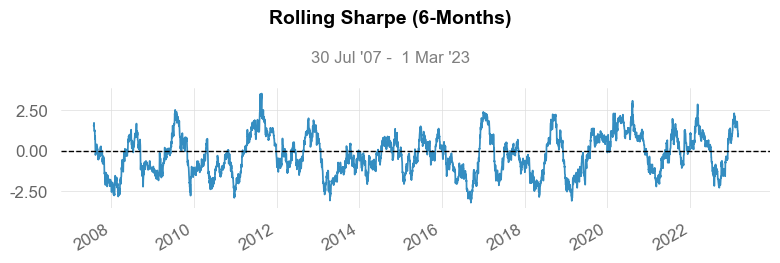

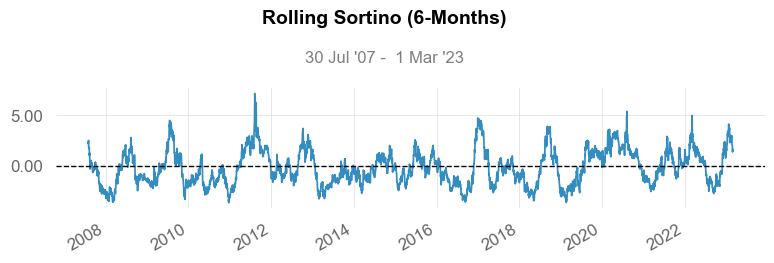

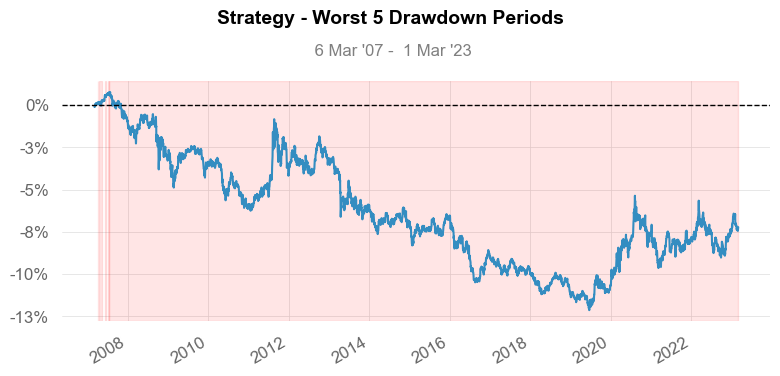

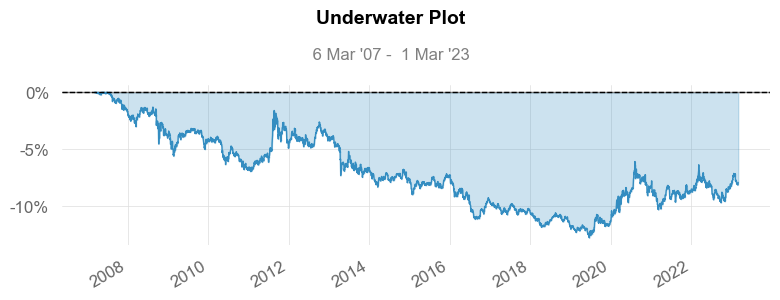

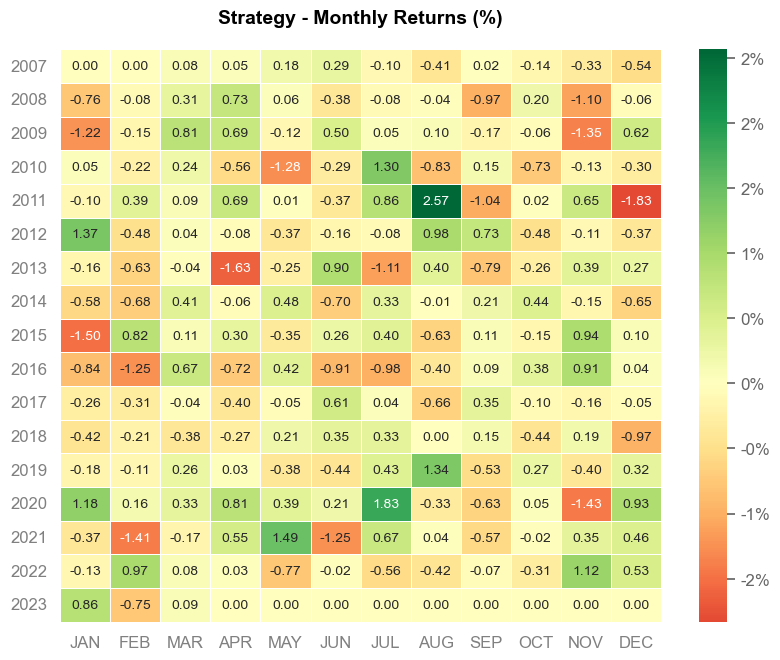

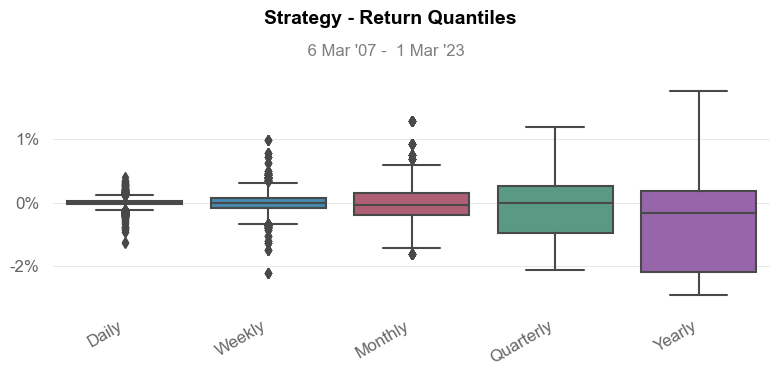

In [50]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H1

In [51]:
TF = 'H1'

In [52]:
data_1 = XAUUSD[TF]

In [53]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

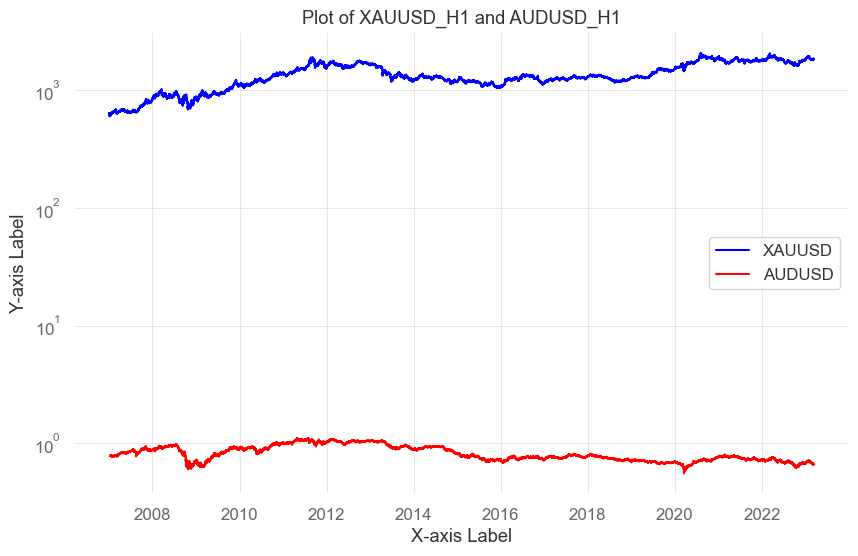

In [54]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [55]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [56]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                          1.207e+06
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        08:54:12   Log-Likelihood:                     -7.2907e+05
No. Observations:               98955   AIC:                                  1.458e+06
Df Residuals:                   98954   BIC:                                  1.458e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1608.4216      1.464   1098.456      0.000    1605.552    1611.292
==============================================================================
Omnibus:                     3606.618   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2901.361
Skew:                           0.340   Prob(JB):                         0.00
Kurtosis:                       2.510   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
result = KF.Run()

### Save Result Backtest 

In [58]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [59]:
filename = f'{Currency_Pair}_{TF}.csv'

In [60]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -7.42%
CAGR﹪                     -0.33%

Sharpe                     -0.17
Prob. Sharpe Ratio         21.92%
Smart Sharpe               -0.17
Sortino                    -0.23
Smart Sortino              -0.23
Sortino/√2                 -0.17
Smart Sortino/√2           -0.16
Omega                      0.97

Max Drawdown               -13.0%
Longest DD Days            5706
Volatility (ann.)          2.12%
Calmar                     -0.03
Skew                       -0.82
Kurtosis                   10.84

Expected Daily %           -0.0%
Expected Monthly %         -0.04%
Expected Yearly %          -0.45%
Kelly Criterion            -1.68%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.22%
Expected Shortfall (cVaR)  -0.22%

Max Consecutive

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-07-18,2019-06-19,2023-03-01,5706,-13.004188,-12.411812
2,2007-04-13,2007-05-04,2007-05-09,27,-0.228383,-0.193012
3,2007-07-06,2007-07-10,2007-07-15,10,-0.118195,-0.086732
4,2007-06-10,2007-06-14,2007-06-22,13,-0.111659,-0.097862
5,2007-04-03,2007-04-06,2007-04-11,9,-0.089393,-0.079538


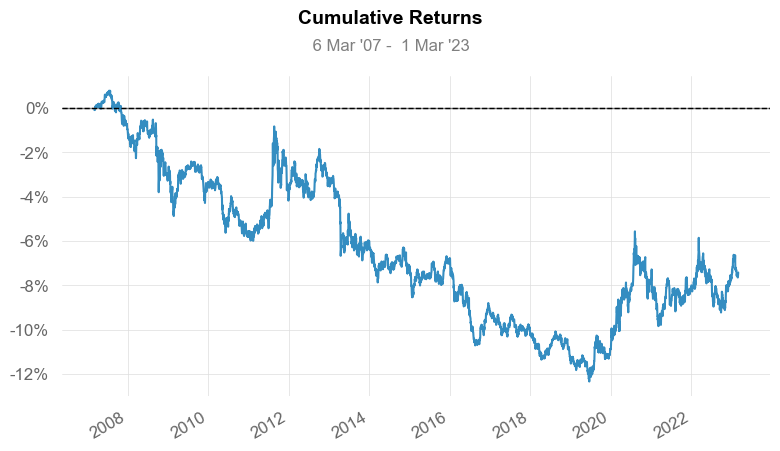

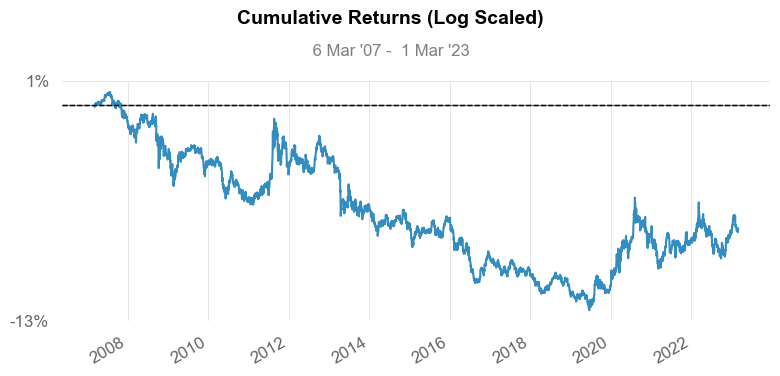

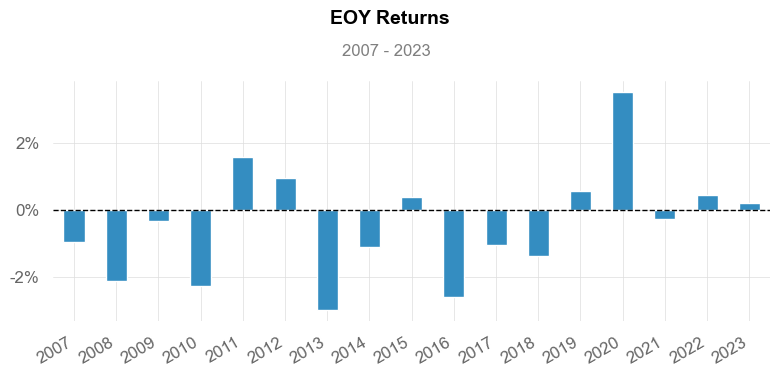

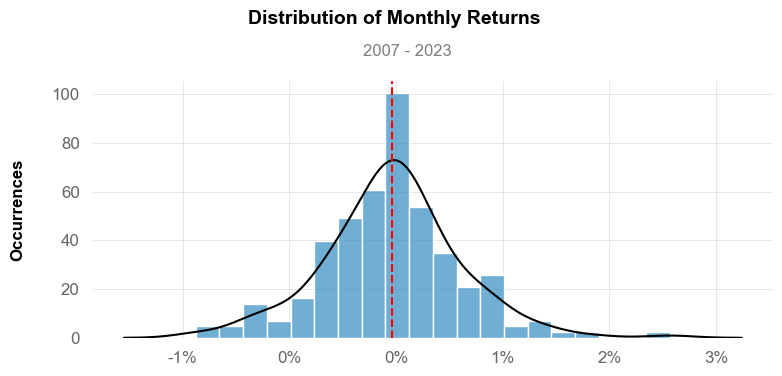

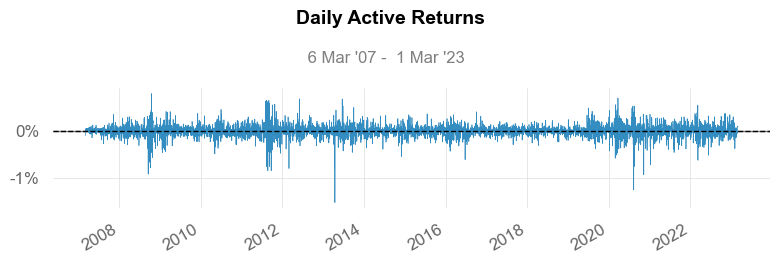

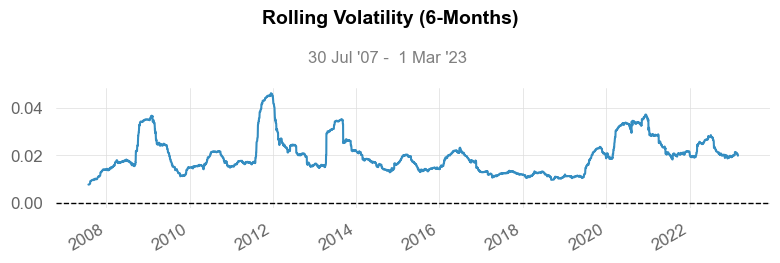

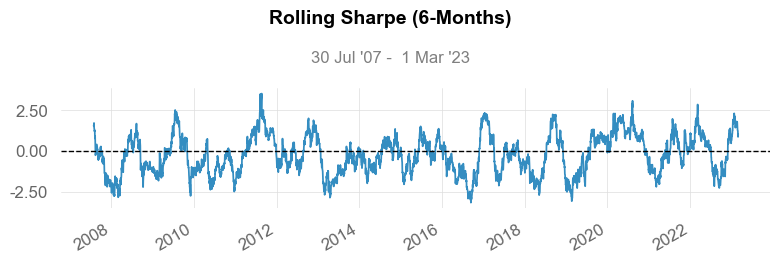

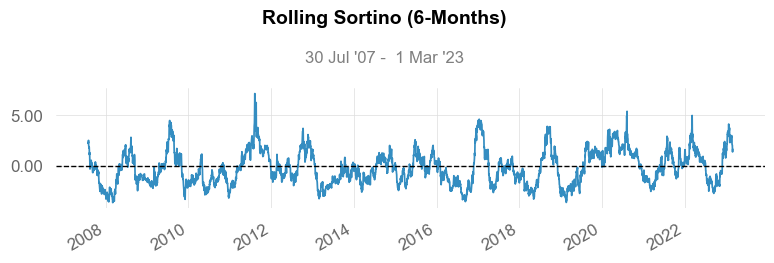

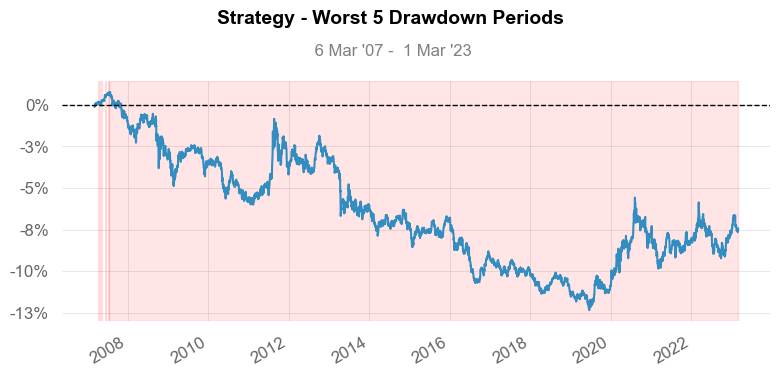

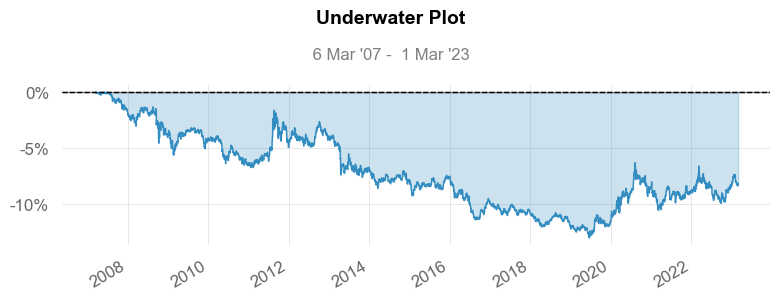

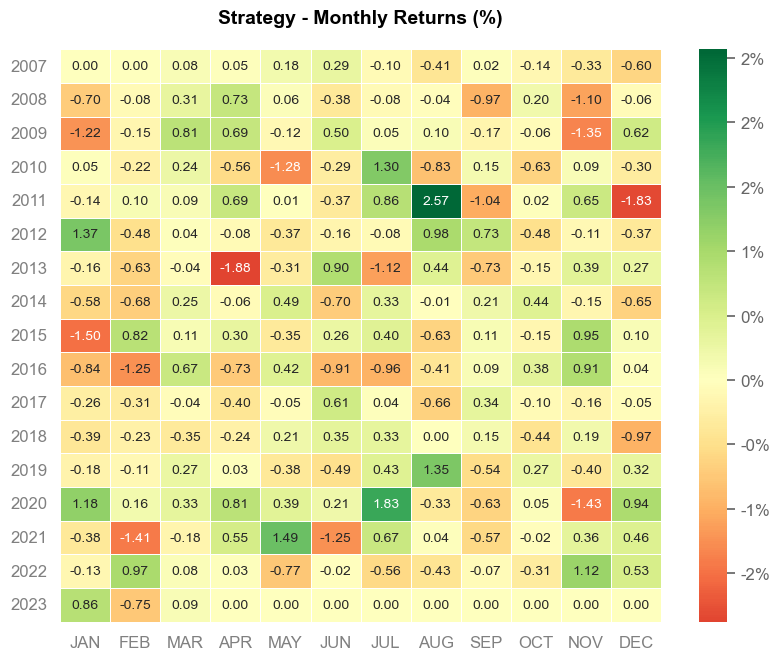

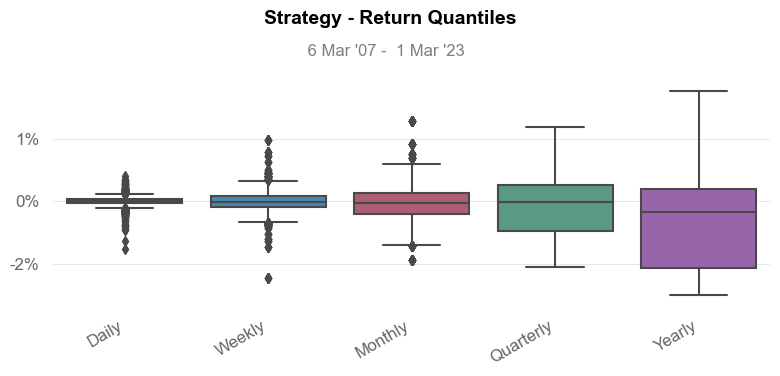

In [61]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change().resample('D').last().dropna())

## TF H30

In [62]:
TF = 'M30'

In [63]:
data_1 = XAUUSD[TF]

In [64]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

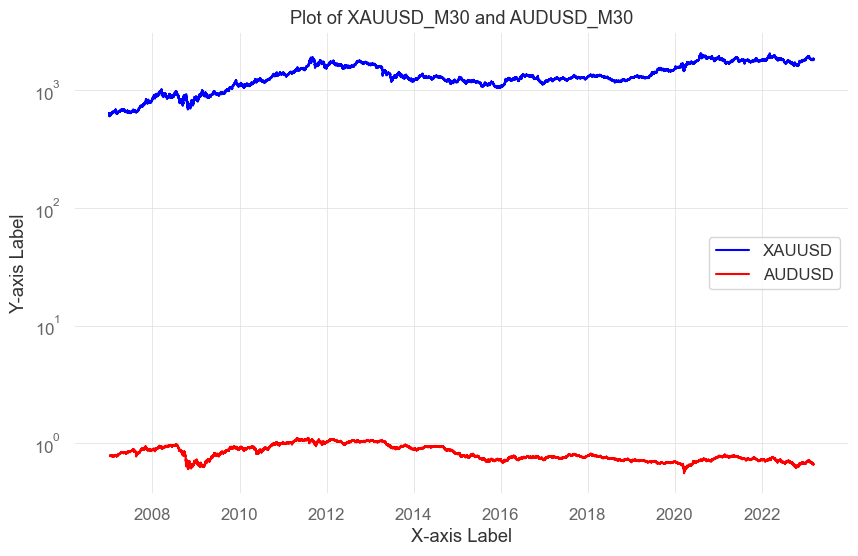

In [65]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [66]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [67]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                          2.413e+06
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        08:58:51   Log-Likelihood:                     -1.4573e+06
No. Observations:              197804   AIC:                                  2.915e+06
Df Residuals:                  197803   BIC:                                  2.915e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1608.6280      1.036   1553.304      0.000    1606.598    1610.658
==============================================================================
Omnibus:                     7204.475   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5792.797
Skew:                           0.340   Prob(JB):                         0.00
Kurtosis:                       2.510   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
result = KF.Run()

### Save Result Backtest 

In [69]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [70]:
filename = f'{Currency_Pair}_{TF}.csv'

In [71]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -7.58%
CAGR﹪                     -0.34%

Sharpe                     -0.18
Prob. Sharpe Ratio         21.49%
Smart Sharpe               -0.18
Sortino                    -0.24
Smart Sortino              -0.24
Sortino/√2                 -0.17
Smart Sortino/√2           -0.17
Omega                      0.97

Max Drawdown               -13.16%
Longest DD Days            5706
Volatility (ann.)          2.12%
Calmar                     -0.03
Skew                       -0.95
Kurtosis                   12.79

Expected Daily %           -0.0%
Expected Monthly %         -0.04%
Expected Yearly %          -0.46%
Kelly Criterion            -1.72%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.22%
Expected Shortfall (cVaR)  -0.22%

Max Consecutiv

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-07-18,2019-06-19,2023-03-01,5706,-13.157692,-12.550178
2,2007-04-13,2007-05-04,2007-05-09,27,-0.228367,-0.192998
3,2007-07-06,2007-07-10,2007-07-15,10,-0.118186,-0.086726
4,2007-06-10,2007-06-14,2007-06-22,13,-0.111651,-0.097855
5,2007-04-03,2007-04-06,2007-04-11,9,-0.089386,-0.079532


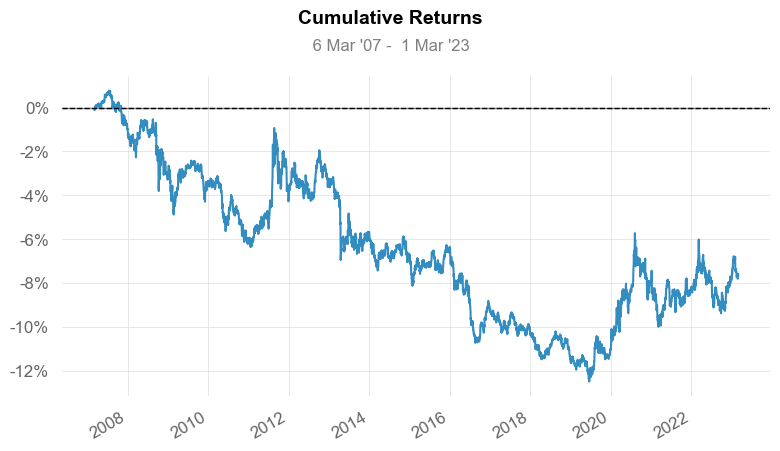

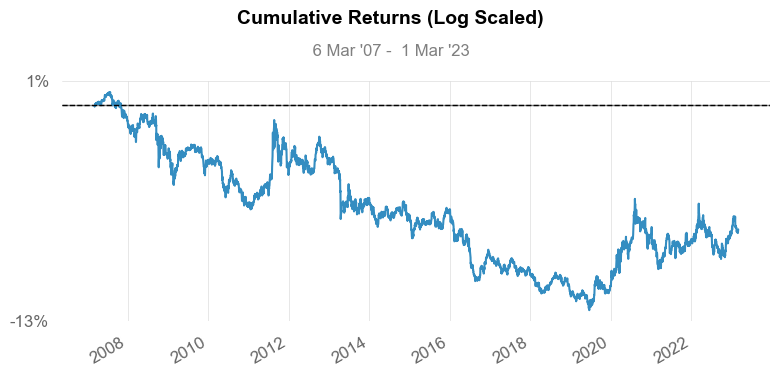

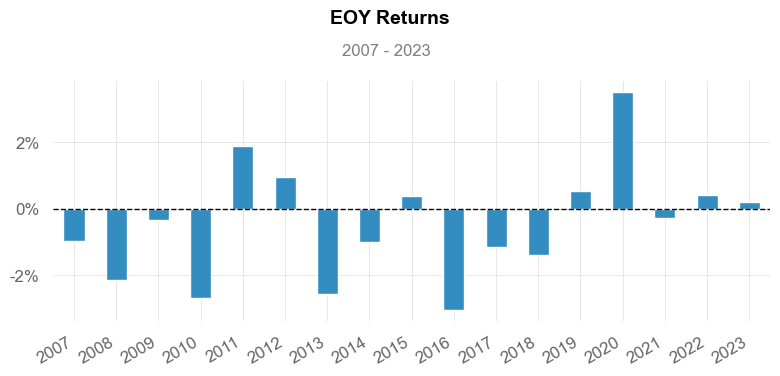

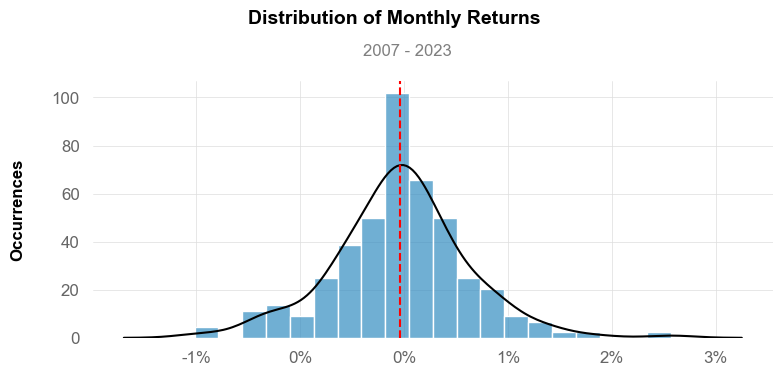

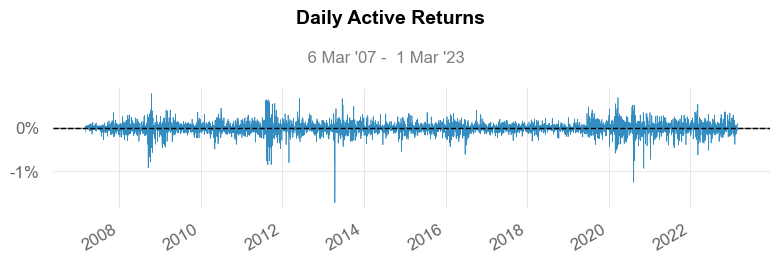

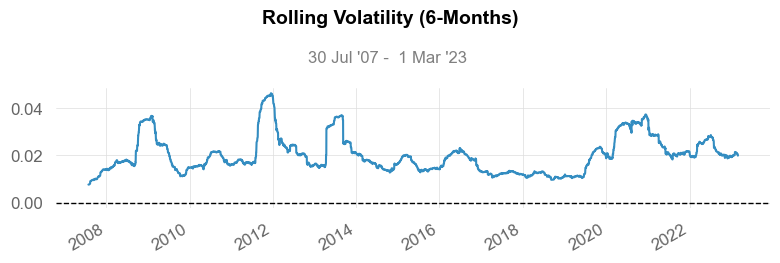

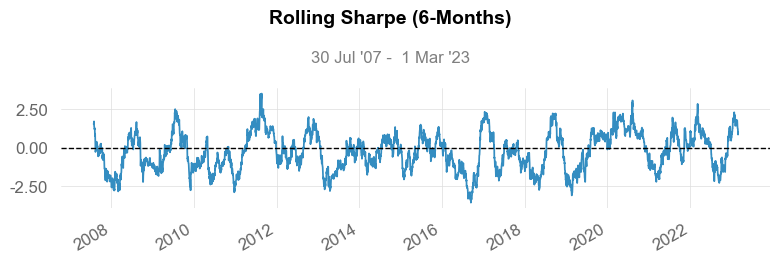

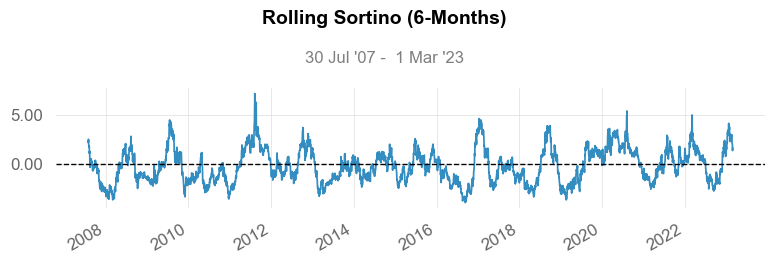

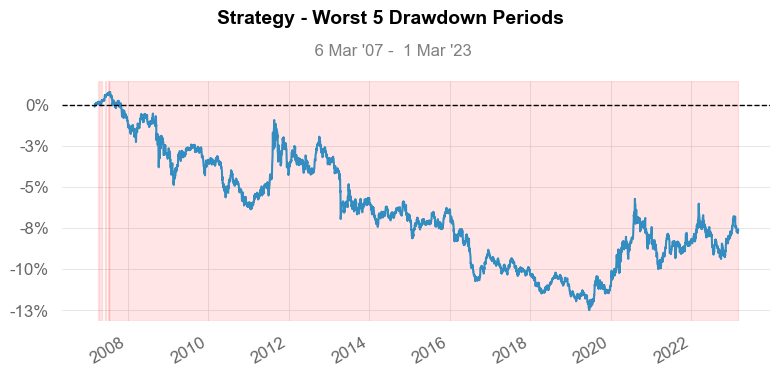

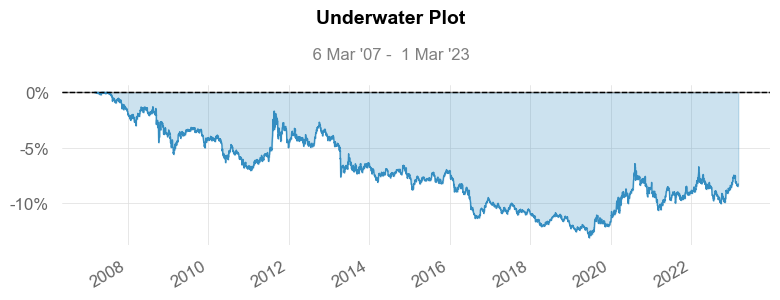

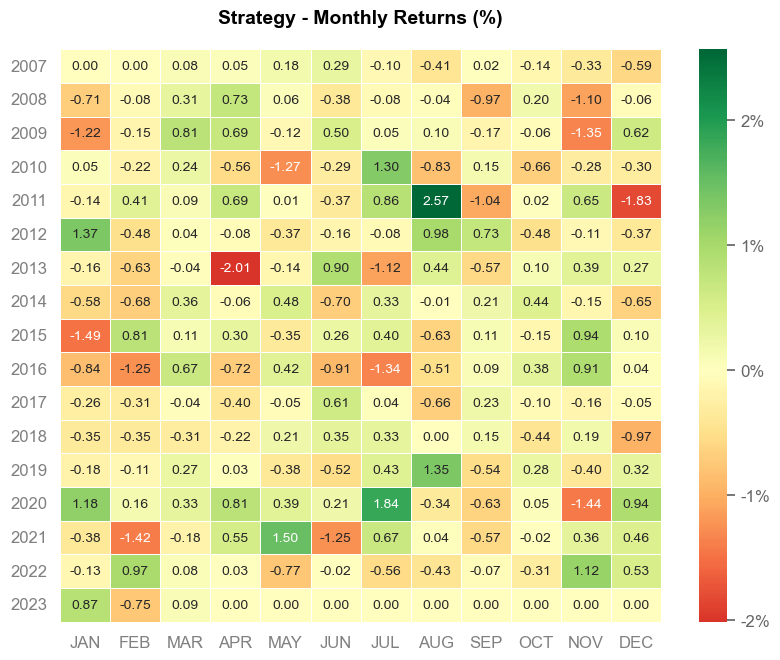

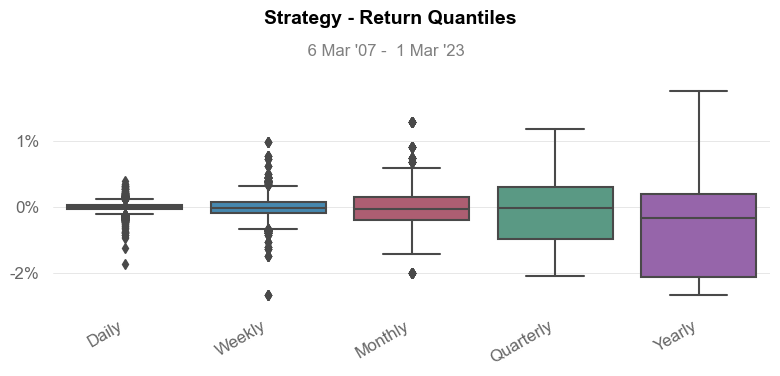

In [72]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change().resample('D').last().dropna())